In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
data  = pd.read_excel("/content/gdrive/MyDrive/Mumbai House Price Prediction Using Machine Learning/Mumbai_Final_File_lac_And_Cr.xlsx")

In [41]:
data

,SPID,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,TOTAL_FLOOR,CLASS,PRICE_SQFT,AREA,CLASS_LABEL,SOCIETY_NAME,LOCALITY_NAME,FURNISH,VALUE IN LACS,VALUE IN CR,PRICE.2 - Copy - Copy.3
0,70903782,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2850,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2215.00,22.1500,Cr
1,70158666,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.00,22.1400,Cr
2,70839072,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.00,22.1400,Cr
3,70677732,Residential Apartment,Mumbai Harbour,4,5,72,A,57100,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,1627.00,16.2700,Cr
4,70795272,Residential Apartment,Mumbai South West,3,5,20,A,104985,1521,Dealer,Parishram by Rustomjee,Bandra West',Semi-furnished,1597.00,15.9700,Cr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,67691832,Residential Apartment,Mumbai Beyond Thane,1,6,4,B,5036,510,Builder,Deepali Residency,Badlapur East',Semi-furnished,26.00,0.2600,L
923,70569332,Studio Apartment,Navi Mumbai,1,5,4,A,9544,262,Dealer,Sandeep Kedardham,Panvel',Semi-furnished,25.10,0.2510,L
924,70741546,Residential Apartment,Mumbai Beyond Thane,1,6,12,A,5227,475,Dealer,Balaji Ambar Vaastu,Badlapur East',Semi-furnished,24.83,0.2483,L
925,70449094,Residential Apartment,Mumbai Beyond Thane,1,6,7,A,3738,655,Dealer,Raj Tulsi City,Badlapur East',Semi-furnished,24.49,0.2449,L


In [42]:
data.head(5)

,SPID,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,TOTAL_FLOOR,CLASS,PRICE_SQFT,AREA,CLASS_LABEL,SOCIETY_NAME,LOCALITY_NAME,FURNISH,VALUE IN LACS,VALUE IN CR,PRICE.2 - Copy - Copy.3
0,70903782,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2850,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2215.0,22.15,Cr
1,70158666,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.0,22.14,Cr
2,70839072,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.0,22.14,Cr
3,70677732,Residential Apartment,Mumbai Harbour,4,5,72,A,57100,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,1627.0,16.27,Cr
4,70795272,Residential Apartment,Mumbai South West,3,5,20,A,104985,1521,Dealer,Parishram by Rustomjee,Bandra West',Semi-furnished,1597.0,15.97,Cr


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SPID                     927 non-null    int64  
 1   PROPERTY_TYPE            927 non-null    object 
 2   CITY                     927 non-null    object 
 3   BEDROOM_NUM              927 non-null    int64  
 4   AGE                      927 non-null    int64  
 5   TOTAL_FLOOR              927 non-null    int64  
 6   CLASS                    927 non-null    object 
 7   PRICE_SQFT               927 non-null    int64  
 8   AREA                     927 non-null    int64  
 9   CLASS_LABEL              927 non-null    object 
 10  SOCIETY_NAME             927 non-null    object 
 11  LOCALITY_NAME            927 non-null    object 
 12  FURNISH                  927 non-null    object 
 13  VALUE IN LACS            927 non-null    float64
 14  VALUE IN CR              9

In [44]:
data.describe()

,SPID,BEDROOM_NUM,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,VALUE IN LACS,VALUE IN CR
count,9.270000e+02,927.000000,927.000000,927.000000,9.270000e+02,927.000000,927.000000,927.000000
mean,7.018109e+07,2.353830,5.229773,33.099245,3.402104e+04,1044.634304,317.745609,3.177456
std,8.599085e+05,0.952401,0.420914,15.363658,4.529847e+04,633.658714,287.649816,2.876498
min,6.627452e+07,1.000000,5.000000,2.000000,3.738000e+03,262.000000,23.150000,0.231500
25%,6.968904e+07,2.000000,5.000000,20.000000,2.000000e+04,632.000000,127.910000,1.279100
50%,7.052821e+07,2.000000,5.000000,29.000000,2.744500e+04,886.000000,242.000000,2.420000
75%,7.076391e+07,3.000000,5.000000,47.000000,3.546800e+04,1266.000000,380.000000,3.800000
max,7.102316e+07,6.000000,6.000000,72.000000,1.093824e+06,4407.000000,2215.000000,22.150000


In [45]:
data.CLASS.unique()

array(['A', 'B'], dtype=object)

In [46]:
data.PROPERTY_TYPE.unique()

array(['Residential Apartment', 'Studio Apartment'], dtype=object)

In [47]:
data.CLASS_LABEL.unique()

array(['Dealer', 'Builder'], dtype=object)

In [48]:
data.FURNISH.unique()

array(['Semi-furnished ', 'Custom furnished ', 'Fully furnished'],
      dtype=object)

In [49]:
data.CITY.unique()

array(['Mumbai Harbour', 'Mumbai South West', 'Central Mumbai suburbs',
       'South Mumbai', 'Mumbai Beyond Thane', 'Mumbai Andheri-Dahisar',
       'Thane', 'Navi Mumbai', 'Mira Road And Beyond'], dtype=object)

In [50]:
def preprocessing_inputs(df):
  df = df.copy()
  # Assuming your column is named 'Class_Column'
  df['CLASS'] = df['CLASS'].apply(lambda x: 1 if x == 'A' else 0)
  #
  df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].apply(lambda x: 1 if x == 'Residential Apartment' else 0)
  #
  df['CLASS_LABEL'] = df['CLASS_LABEL'].apply(lambda x: 1 if x == 'Dealer' else 0)
  #
  # Apply a simple lambda function to map 'Semi-furnished' to 0, 'Custom furnished' to 1, and 'Fully furnished' to 2
  df['FURNISH'] = df['FURNISH'].apply(lambda x: 0 if x == 'Semi-furnished' else (1 if x == 'Custom furnished' else 2))
  #
  le = LabelEncoder()
  df['CITY'] = le.fit_transform(df['CITY'])
  # drop unneed col
  df = df.drop(['SOCIETY_NAME','PRICE.2 - Copy - Copy.3','LOCALITY_NAME'],axis = 1)

  # split data into x and y
  X = df.drop(['VALUE IN CR'],axis = 1)
  y = df['VALUE IN CR']

  # Step 5: Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Step 6: Train a Linear Regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Step 7: Make predictions on the test set
  y_pred = model.predict(X_test)

  # Step 8: Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error (MSE): {mse}')
  print(f'R² Score: {r2}')
  print(f'y_pred: {y_pred}')
  print(f'y_test: {y_test}')

  # Step 9: Compare real vs predicted values
  comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  print(comparison)

  # Step 10: Plot real vs predicted values

  # Line plot for real vs predicted values
  # 1. Line Plot for Real vs Predicted
  # A line plot helps to show how close the
  # predicted values are to the actual ones over the test data. It’s useful for identifying patterns and trends.
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 6))
  plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
  plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed', label='Predicted')
  plt.title('Real vs Predicted Values (Line Plot)')
  plt.legend()
  plt.show()

# 2. Residual Plot
# A residual plot shows the difference between the actual and predicted values (i.e., residuals).
# It helps to check if the errors are randomly distributed, which is a good sign for model accuracy.

  # Residual plot
  residuals = y_test - y_pred
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(residuals)), residuals, color='purple')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.title('Residuals (Actual - Predicted)')
  plt.xlabel('Index')
  plt.ylabel('Residual')
  plt.show()

  # 3. Histogram of Residuals
#  A  histogram of residuals shows the distribution of errors.
#  A normal distribution (centered around zero) indicates a good model fit.
  # Histogram of residuals
  plt.figure(figsize=(10, 6))
  plt.hist(residuals, bins=20, color='green', edgecolor='black')
  plt.title('Distribution of Residuals')
  plt.xlabel('Residual')
  plt.ylabel('Frequency')
  plt.show()

# 4. Scatter Plot (Actual vs Predicted)
# A scatter plot showing actual values vs. predicted values gives insight into
# how well the model captures the true data. A perfect prediction would align all points on the 45-degree line.
  # Scatter plot (Actual vs Predicted)
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, color='orange')
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2)  # 45-degree line
  plt.title('Actual vs Predicted Scatter Plot')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()
  #


  return X_train,X_test,y_train,y_test


Mean Squared Error (MSE): 9.245362500366112e-30
R² Score: 1.0
y_pred: [ 4.97    2.56   10.58    7.64    0.9     0.4659  2.97    6.28    3.19
  3.3     7.73    1.85    0.6     0.9342  2.12    3.78    1.56    0.5367
  4.31    1.66    3.19    3.37    9.87    0.9114  2.94    0.8411  2.95
  0.6864  3.83    0.7639  0.9091  2.85    1.84    3.34    0.5006  0.883
  2.94    3.07    2.3     6.5     4.18    0.9144  3.52    3.88    0.5464
  3.18    3.95    0.6639  0.9093 11.6     3.19    3.19    0.83    0.7672
  3.52    3.18    6.87    7.64    0.866   1.85    3.9     2.1     2.09
  1.6     1.85    2.36    0.2449  0.8939  3.98    3.49    3.19    1.85
  7.64    5.18    9.24    1.98    3.63    3.25    5.04    5.83    4.88
  3.27    2.34    1.85    3.17    3.13    0.7597  0.51    0.53    3.26
  0.9335  8.18    2.5     4.79    2.31    1.6     0.9425  0.95    7.67
  1.82    2.63    0.7123  0.9093  3.71    2.56    6.2     0.6766  0.6899
  0.5967  3.35    2.5     1.64    2.11    0.26    7.4     2.14    1.9

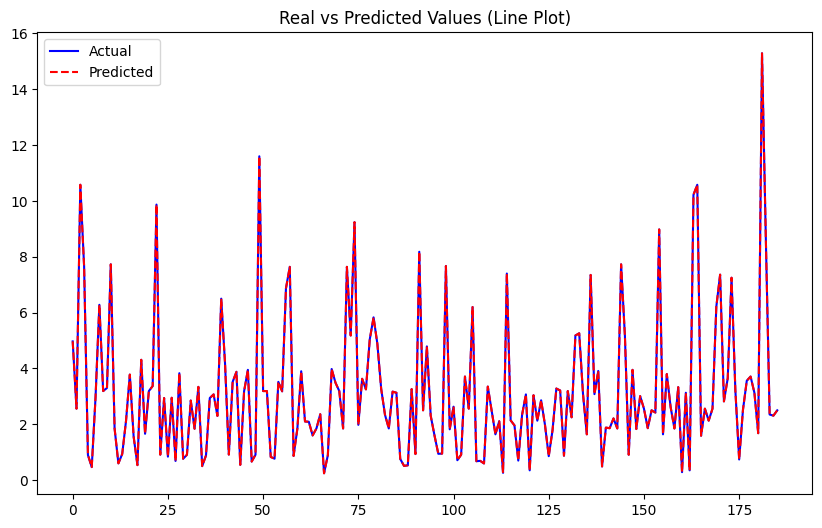

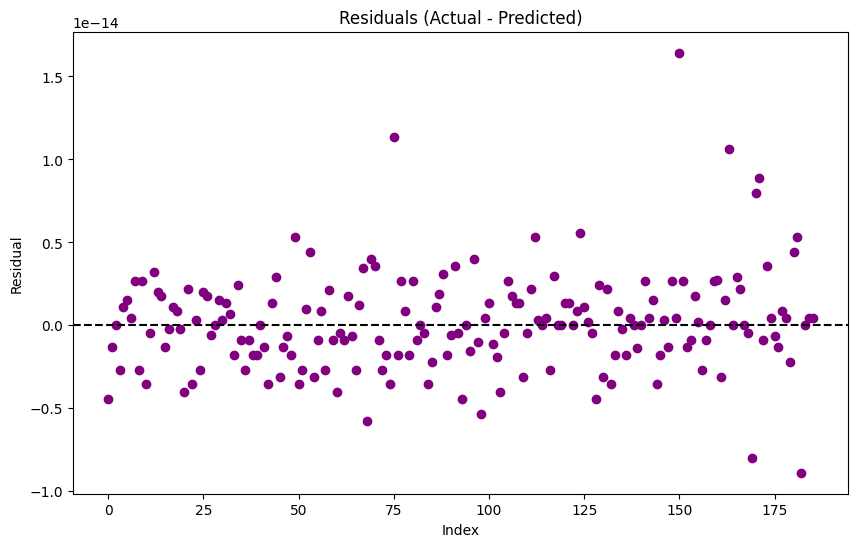

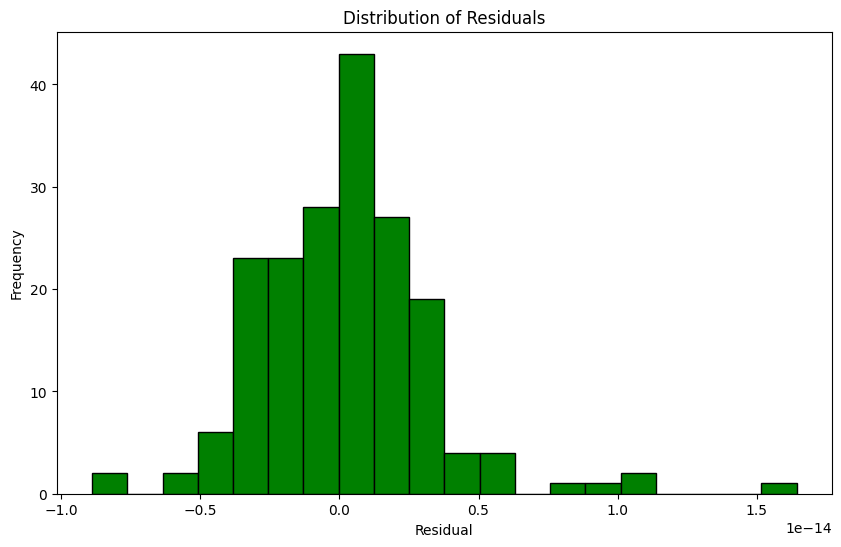

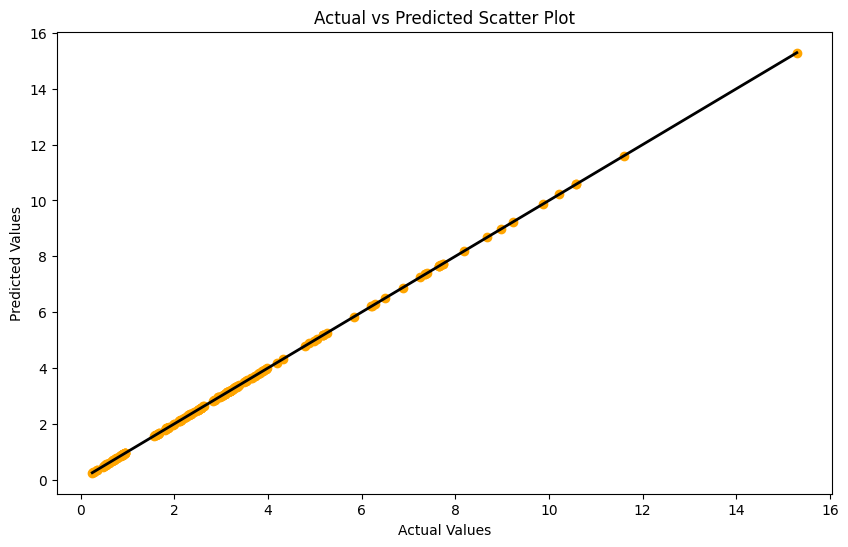

In [51]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [53]:
regression_models = {
    'Linear_Regression' : LinearRegression(),
    'Ridge'             : Ridge(),
    'Lasso'             : Lasso(),
    "Decision_Tree"     : DecisionTreeRegressor(),
    "Random_Forest"     : RandomForestRegressor(),

}
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print(name + ' Trained')

Linear_Regression Trained
Ridge Trained
Lasso Trained
Decision_Tree Trained
Random_Forest Trained


In [54]:
for name, model in regression_models.items():
    print(name + ' Accuracy : {:2f}'.format(model.score(X_test,y_test)))

Linear_Regression Accuracy : 1.000000
Ridge Accuracy : 1.000000
Lasso Accuracy : 0.999997
Decision_Tree Accuracy : 0.999148
Random_Forest Accuracy : 0.998944


In [55]:
data

,SPID,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,TOTAL_FLOOR,CLASS,PRICE_SQFT,AREA,CLASS_LABEL,SOCIETY_NAME,LOCALITY_NAME,FURNISH,VALUE IN LACS,VALUE IN CR,PRICE.2 - Copy - Copy.3
0,70903782,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2850,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2215.00,22.1500,Cr
1,70158666,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.00,22.1400,Cr
2,70839072,Residential Apartment,Mumbai Harbour,4,5,72,A,77709,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,2214.00,22.1400,Cr
3,70677732,Residential Apartment,Mumbai Harbour,4,5,72,A,57100,2849,Dealer,Piramal Aranya,Byculla East',Semi-furnished,1627.00,16.2700,Cr
4,70795272,Residential Apartment,Mumbai South West,3,5,20,A,104985,1521,Dealer,Parishram by Rustomjee,Bandra West',Semi-furnished,1597.00,15.9700,Cr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,67691832,Residential Apartment,Mumbai Beyond Thane,1,6,4,B,5036,510,Builder,Deepali Residency,Badlapur East',Semi-furnished,26.00,0.2600,L
923,70569332,Studio Apartment,Navi Mumbai,1,5,4,A,9544,262,Dealer,Sandeep Kedardham,Panvel',Semi-furnished,25.10,0.2510,L
924,70741546,Residential Apartment,Mumbai Beyond Thane,1,6,12,A,5227,475,Dealer,Balaji Ambar Vaastu,Badlapur East',Semi-furnished,24.83,0.2483,L
925,70449094,Residential Apartment,Mumbai Beyond Thane,1,6,7,A,3738,655,Dealer,Raj Tulsi City,Badlapur East',Semi-furnished,24.49,0.2449,L


In [56]:
def preprocessing_inputs_1(df):
  df = df.copy()
  # Assuming your column is named 'Class_Column'
  df['CLASS'] = df['CLASS'].apply(lambda x: 1 if x == 'A' else 0)
  #
  df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].apply(lambda x: 1 if x == 'Residential Apartment' else 0)
  #
  df['CLASS_LABEL'] = df['CLASS_LABEL'].apply(lambda x: 1 if x == 'Dealer' else 0)
  #
  # Apply a simple lambda function to map 'Semi-furnished' to 0, 'Custom furnished' to 1, and 'Fully furnished' to 2
  df['FURNISH'] = df['FURNISH'].apply(lambda x: 0 if x == 'Semi-furnished' else (1 if x == 'Custom furnished' else 2))
  #
  le = LabelEncoder()
  df['CITY'] = le.fit_transform(df['CITY'])
  # drop unneed col
  df = df.drop(['SOCIETY_NAME','PRICE.2 - Copy - Copy.3','LOCALITY_NAME'],axis = 1)
  return df

In [57]:
X = preprocessing_inputs_1(data)


In [58]:
X

,SPID,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,TOTAL_FLOOR,CLASS,PRICE_SQFT,AREA,CLASS_LABEL,FURNISH,VALUE IN LACS,VALUE IN CR
0,70903782,1,4,4,5,72,1,77709,2850,1,2,2215.00,22.1500
1,70158666,1,4,4,5,72,1,77709,2849,1,2,2214.00,22.1400
2,70839072,1,4,4,5,72,1,77709,2849,1,2,2214.00,22.1400
3,70677732,1,4,4,5,72,1,57100,2849,1,2,1627.00,16.2700
4,70795272,1,5,3,5,20,1,104985,1521,1,2,1597.00,15.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,67691832,1,3,1,6,4,0,5036,510,0,2,26.00,0.2600
923,70569332,0,6,1,5,4,1,9544,262,1,2,25.10,0.2510
924,70741546,1,3,1,6,12,1,5227,475,1,2,24.83,0.2483
925,70449094,1,3,1,6,7,1,3738,655,1,2,24.49,0.2449


# 🏠 Exploratory Data Analysis (EDA) of Mumbai Real Estate Property Dataset 🏙️

# Question 1 : Can you describe how you would visualize the distribution of property types in a dataset?

Code Explanation:

plt.figure(figsize=(10, 6)): Sets the figure size to make the chart more readable.

X['PROPERTY_TYPE'].value_counts(): Counts the occurrences of each unique property type in the dataset.
.plot(kind='bar', color='skyblue'): Creates a bar chart with a color scheme that makes it visually appealing and easy to interpret.

plt.title('Distribution of Property Types'): Adds a title to describe what the chart represents.

plt.xlabel('Property Type') and plt.ylabel('Count of Properties'): Labels the x-axis and y-axis for clarity.

plt.xticks(rotation=45): Rotates the x-axis labels for better readability if there are many property types.

Why This Visualization Works:

A bar chart is ideal here because it clearly shows the number of properties for each type, allowing stakeholders to easily identify which property types are most or least common in the dataset. This visual can guide decision-making on focusing on certain property types or identifying potential gaps in property variety.

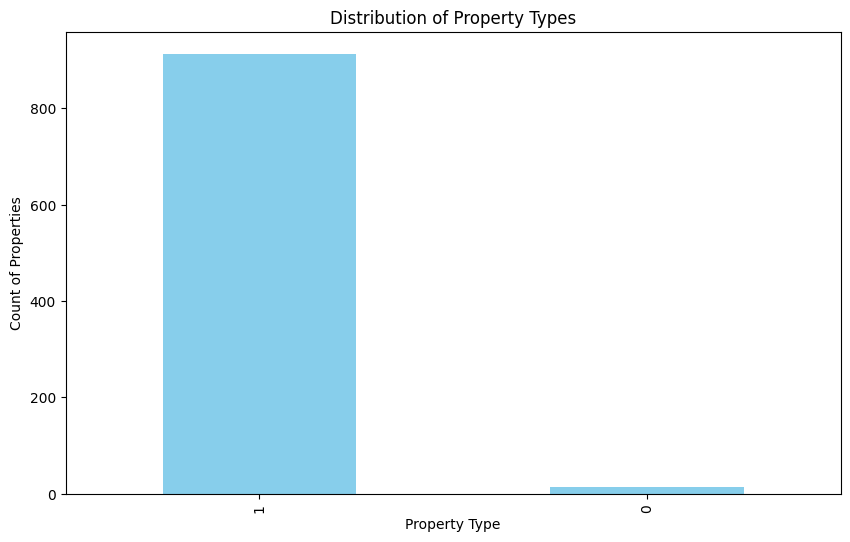

In [59]:
# 1. Bar Chart: Distribution of Property Types
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
X['PROPERTY_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count of Properties')
plt.show()

# Question 2: How would you visualize the age distribution of properties in a dataset?

Answer:

To visualize the age distribution of properties, I would use a histogram. This allows for an effective display of the frequency distribution of property ages, highlighting how many properties fall within specific age ranges. Here’s the

code and the explanation:
plt.figure(figsize=(10, 6)): Sets the figure size to ensure the chart is easily viewable.

X['AGE'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black'): Creates a histogram of property ages.

bins=20 specifies the number of bins to group property ages, providing a clear breakdown across different age ranges.

color='lightgreen' gives a distinct look to the bars, making the histogram visually appealing.

edgecolor='black' helps define each bin more clearly.

plt.title('Distribution of Property Ages'): Provides a descriptive title to convey the purpose of the chart.

plt.xlabel('Age of Properties (Years)') and plt.ylabel('Count of Properties'): Label the x-axis and y-axis, making it easy to understand the distribution being analyzed.

Why This Visualization Works:

A histogram is ideal for showing the distribution of continuous data, like property age. This chart allows us to see where most properties fall in terms of age, identify any peaks or common property ages, and quickly notice if there are more older or newer properties in the dataset. This information can guide insights about property maintenance, renovation needs, or the prevalence of older versus newer properties.

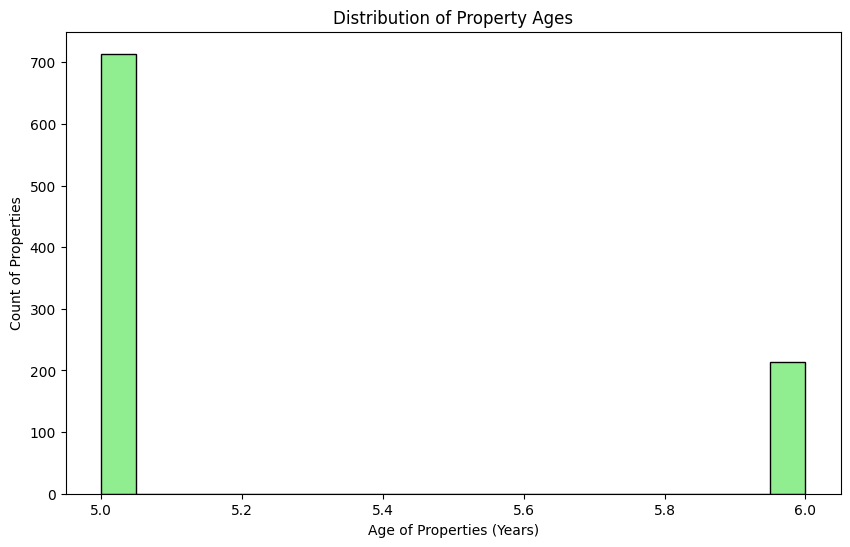

In [60]:
# 2. Histogram: Age of Properties
plt.figure(figsize=(10, 6))
X['AGE'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Property Ages')
plt.xlabel('Age of Properties (Years)')
plt.ylabel('Count of Properties')
plt.show()



Answer:

To analyze the relationship between property area and price per square foot, I would use a scatter plot. This type of visualization helps reveal patterns, trends, and potential outliers between two continuous variables. Below is the code and the explanation for creating this scatter plot:

# Question 3: How would you analyze the relationship between property area and price per square foot?



Answer:

To analyze the relationship between property area and price per square foot, I would use a scatter plot. This type of visualization helps reveal patterns, trends, and potential outliers between two continuous variables. Below is the code and the explanation for creating this scatter plot:

Code Explanation:

plt.figure(figsize=(10, 6)): Sets an appropriate figure size for readability.

plt.scatter(X['AREA'], X['PRICE_SQFT'], alpha=0.6, color='purple'): Creates a scatter plot where:
X['AREA'] is plotted on the x-axis, representing the property area in square feet.

X['PRICE_SQFT'] is on the y-axis, showing the price per square foot.

alpha=0.6 adjusts the transparency to make overlapping points more visible, which is helpful in identifying data density.

color='purple' gives the plot a distinct and visually appealing color.

plt.title('Price per Sqft vs Area of Properties'): Adds a clear title that describes the purpose of the plot.

plt.xlabel('Area (Sqft)') and plt.ylabel('Price per Sqft'): Label the axes to clearly communicate the variables being compared.

Why This Visualization Works:

A scatter plot is ideal for examining the relationship between two continuous variables. Here, it allows us to observe if there is any trend between property area and price per square foot. For example, we may see that smaller areas tend to have a higher price per square foot or spot any unusual patterns or outliers, such as very high prices for specific property sizes. This can provide insights into pricing strategies, market trends, or even location-based demand if further segmented.

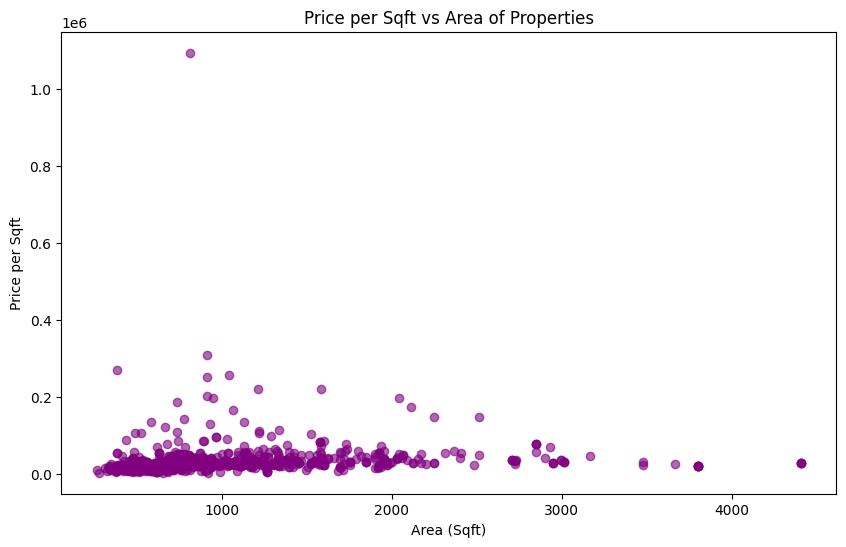

In [61]:
# 3. Scatter Plot: Price per Sqft vs Area
plt.figure(figsize=(10, 6))
plt.scatter(X['AREA'], X['PRICE_SQFT'], alpha=0.6, color='purple')
plt.title('Price per Sqft vs Area of Properties')
plt.xlabel('Area (Sqft)')
plt.ylabel('Price per Sqft')
plt.show()

In [62]:
# # 4. Heatmap: Correlation Matrix for Numeric Features
# plt.figure(figsize=(10, 8))
# sns.heatmap(X[['BEDROOM_NUM', 'TOTAL_FLOOR', 'AGE', 'PRICE_SQFT', 'VALUE IN CR']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Numeric Features')
# plt.show()

# Question 5: How would you analyze the trend of average property values by age?

Answer:

To analyze how the average property value changes with the age of properties, I would use a line chart. This type of chart effectively shows trends over an ordered, continuous variable (in this case, property age), allowing us to observe whether property value tends to increase or decrease as properties age.

Here’s the code and explanation:
plt.figure(figsize=(10, 6)): Sets the figure size for clarity.

X.groupby('AGE')['VALUE IN CR'].mean(): Groups the data by property age and calculates the average value (VALUE IN CR) for each age group.

plot(kind='line', color='red'): Creates a line chart using a red color to make the trend line clear and distinct.

plt.title('Average Property Value by Age of Property'): Adds a title to indicate the focus of the chart.

plt.xlabel('Age (Years)') and plt.ylabel('Average Value (in Crores)'): Labels the axes to show what is being measured, making the chart easy to interpret.

Why This Visualization Works:

A line chart is effective here because it shows how the average property value changes progressively with the age of properties. By grouping the data by property age and plotting the average value, this chart reveals any patterns, such as a possible decrease in value as properties age or spikes for specific ages that might indicate periods of high demand. Such insights are valuable in understanding property value depreciation trends or identifying if older properties retain higher value in certain markets.

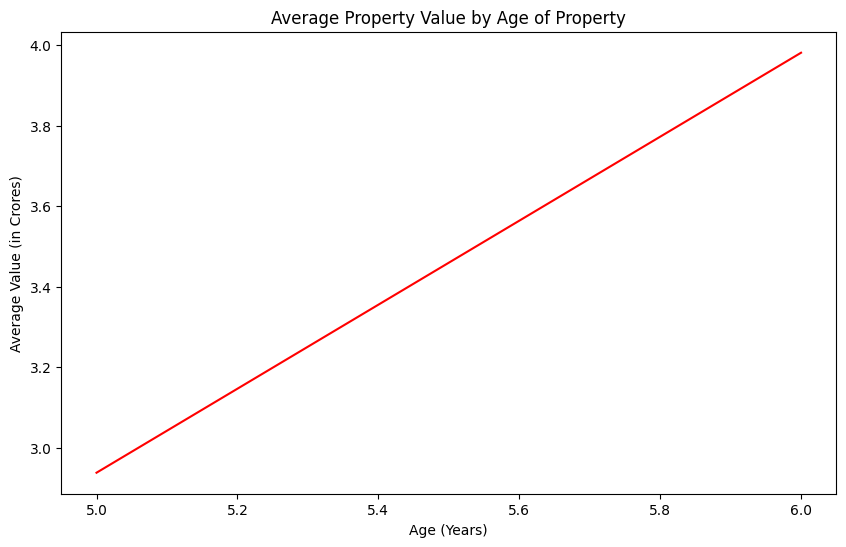

In [63]:
# 5. Line Chart: Average Property Value by City and Age
plt.figure(figsize=(10, 6))
X.groupby('AGE')['VALUE IN CR'].mean().plot(kind='line', color='red')
plt.title('Average Property Value by Age of Property')
plt.xlabel('Age (Years)')
plt.ylabel('Average Value (in Crores)')
plt.show()

In [64]:
pip install squarify

# Question 6 : How would you analyze property prices per square foot across cities and property types?

Answer:

To analyze how property prices per square foot vary by city and property type, I would use a grouped bar chart. This type of chart allows us to compare multiple categories (in this case, different property types) across several groups (cities) side by side, making it easy to observe differences and patterns.

Here’s the code and explanation:

plt.figure(figsize=(12, 6)): Sets a wide figure size for better readability, especially with multiple cities and property types.

sns.barplot(x='CITY', y='PRICE_SQFT', hue='PROPERTY_TYPE', data=X): Creates a grouped bar chart:
x='CITY' places cities on the x-axis.

y='PRICE_SQFT' places the price per square foot on the y-axis.

hue='PROPERTY_TYPE' groups bars by property type, allowing each city to show bars for different property types side by side.

plt.title('Price per Sqft by City and Property Type'): Adds a title describing the content of the chart.

plt.xlabel('City') and plt.ylabel('Price per Sqft'): Label the axes to clarify the variables being measured.

plt.xticks(rotation=45): Rotates the x-axis labels for better readability, especially when there are several cities.
Why This Visualization Works:

A grouped bar chart is ideal for comparing price per square foot across multiple categories within each city. This chart reveals variations in property pricing based on type (e.g., residential, commercial) within each city, showing both inter-city and intra-city differences in pricing. For instance, one might observe that commercial properties have a higher price per square foot in urban centers, or that some cities have more consistent pricing across property types.


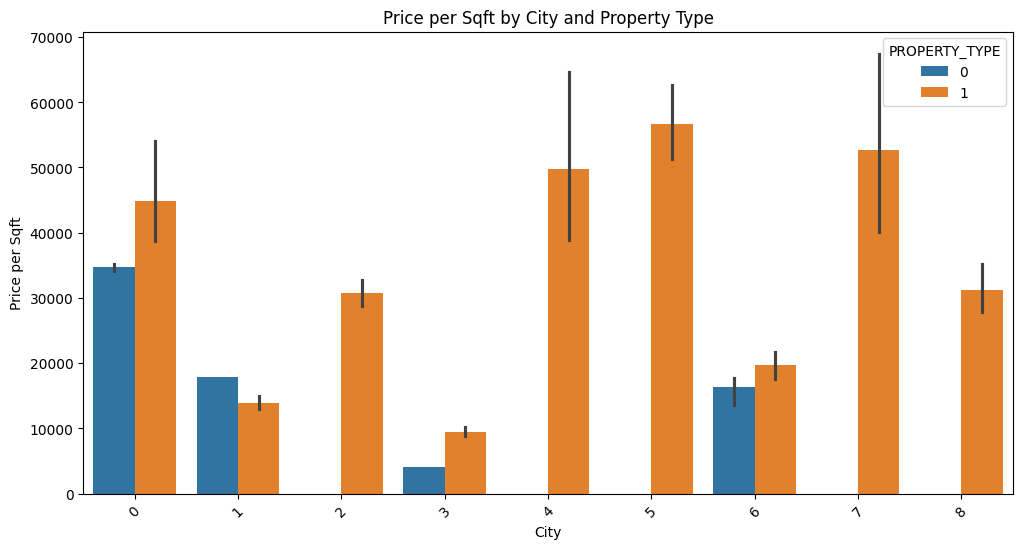

In [65]:
# 6. Grouped Bar Chart: Price per Sqft by City and Property Type
plt.figure(figsize=(12, 6))
sns.barplot(x='CITY', y='PRICE_SQFT', hue='PROPERTY_TYPE', data=X)
plt.title('Price per Sqft by City and Property Type')
plt.xlabel('City')
plt.ylabel('Price per Sqft')
plt.xticks(rotation=45)
plt.show()

# Question 7 : How would you summarize key metrics for a property dataset?

Answer:

To summarize key property metrics, I would use KPI (Key Performance Indicator) visuals to highlight critical values, which can provide a quick snapshot of the dataset. For a property dataset, I’ve calculated the Average Property Value, Total Area of properties, and the Maximum Floors across properties.

Here’s the code and explanation:

avg_value = X['VALUE IN CR'].mean(): Calculates the average property value in crores, providing insight into the typical property price.

Total_area = X['AREA'].sum(): Summing the AREA column gives the total square footage covered by all properties, an important metric for understanding property scale.

max_floors = X['TOTAL_FLOOR'].max(): Finds the maximum number of floors, which can indicate property height extremes in the dataset.

Why These KPIs Are Important:

Average Property Value provides a baseline for pricing, giving stakeholders a quick idea of typical property value within the dataset.
Total Area in square feet helps quantify the scale and size of properties managed or analyzed, useful in capacity planning and space utilization.
Maximum Floors identifies the highest building in the dataset, which is important for zoning, safety regulations, and market analysis.

In [66]:
# 7. KPI Visuals: Average Property Value, Total Area, and Maximum Floors
avg_value = X['VALUE IN CR'].mean()
total_area = X['AREA'].sum()
max_floors = X['TOTAL_FLOOR'].max()

print(f"Average Property Value (in Cr): {avg_value:.2f}")
print(f"Total Area (Sqft): {total_area}")
print(f"Maximum Floors: {max_floors}")

Average Property Value (in Cr): 3.18
Total Area (Sqft): 968376
Maximum Floors: 72
